### 이 3개는 필수로 시각화!
##### 월별 매출액 추세
##### 가장 인기있는 음식/음료
##### 가장 많이 팔린 입장권 종류

###### entry_data: '모두 스터디카페'의 시간별 입장 기록 데이터
###### sales_data: '모두 스터디카페'의 시간별 음식/음료 판매 데이터
###### item_data: '모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격
###### item_entry_data: '모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [2]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [4]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [5]:
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


# 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)
### 월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.

In [6]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

In [7]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [8]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(",","")

In [9]:
# salse_data의 결제금액을 숫자형태로 바꾸기
sales_data['결제금액'] = sales_data['결제금액'].astype(int)

In [10]:
# temp_var의 payment열을 date 기준으로 집계하기
a = temp_var['결제금액'].groupby(temp_var['date']).sum()
a

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 결제금액, dtype: int64

Text(0, 0.5, 'payment')

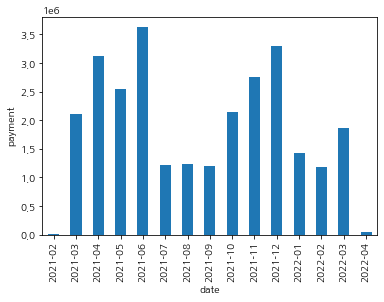

In [33]:
# 집계 결과를 시각화하기
a.plot(kind='bar')
# plt.title('월별 매출액 추세')
plt.xlabel('date')
plt.ylabel('payment')

# 필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)
### 여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [12]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
b = temp_var[temp_var['판매수량']!=-1].value_counts()
b

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date   
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10    4
                        라면          현금    결제완료  1     4000  customer803089  2021-10    4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10    4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06    4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06    3
                                                                                      ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06    1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06    1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06    1
2021-06-13 10:00  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer258946  2021-06    1
2022-04-01 19:41  선불기1  치킨

In [13]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
b_df = pd.DataFrame(b)
b_df[:10]

0
결제일시             판매위치 상품명   결제방식 비고   판매수량 결제금액 고객             date      
2021-10-05 13:33 선불기1 치즈추가  현금   결제완료 1    500  customer803089 2021-10  4
                      라면    현금   결제완료 1    4000 customer803089 2021-10  4
2021-10-07 10:05 선불기1 시럽추가  신용카드 결제완료 1    500  customer777135 2021-10  4
2021-06-19 21:02 선불기1 라면    신용카드 결제완료 1    4000 customer283589 2021-06  4
2021-06-14 11:37 선불기1 치즈추가  신용카드 결제완료 1    500  customer950393 2021-06  3
2021-03-23 13:41 선불기1 계란추가  신용카드 결제완료 1    500  customer556974 2021-03  3
2021-11-29 19:20 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer975556 2021-11  3
2021-06-16 12:17 선불기1 라면    신용카드 결제완료 1    4000 customer996256 2021-06  3
2021-08-22 17:12 선불기1 라면    신용카드 결제완료 1    4000 customer439220 2021-08  3
2021-04-25 18:31 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer304481 2021-04  3

In [14]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

Text(0.5, 1.0, '가장 인기 있는 음식/음료 판매개수')

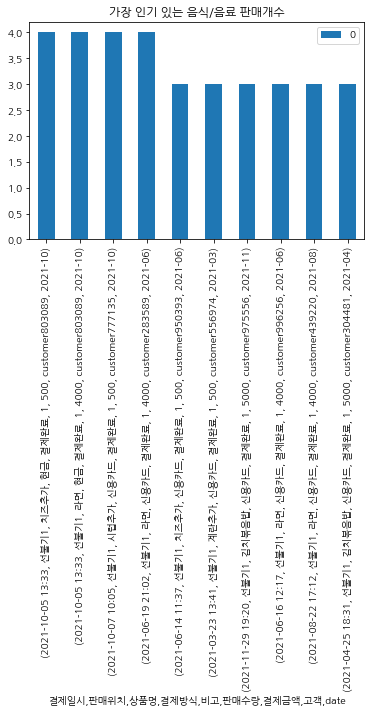

In [15]:
# 집계 결과를 시각화하기
b_df[:10].plot(kind='bar')
plt.title('가장 인기 있는 음식/음료 판매개수')

# 여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [16]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다
c = temp_var['결제금액'].groupby(temp_var['상품명'][temp_var['판매수량']!=-1]).sum()  
c

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              114000
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           67500
Name: 결제금액, Length: 100, dtype: int64

In [17]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
d = c.sort_values(ascending=False)
d.head(10)

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: 결제금액, dtype: int64

Text(0.5, 1.0, '판매 매출 상위 10개')

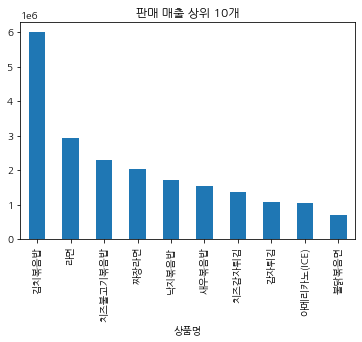

In [18]:
# 집계 결과 시각화하기
d.head(10).plot(kind='bar')
plt.title('판매 매출 상위 10개')

# 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)
### 여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.

In [19]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data

In [20]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

In [21]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
e = temp_var['금액'].groupby(temp_var['요금제명']).sum()

In [22]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
f = e.sort_values(ascending=False)
f.head(10)

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

Text(0.5, 1.0, '가장 많이 팔린 입장권 종류')

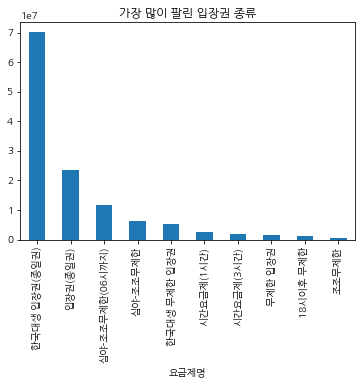

In [23]:
# 집계 결과 시각화하기
f.head(10).plot(kind='bar')
plt.title('가장 많이 팔린 입장권 종류')

# 내가 정의한 문제 해결하기

In [24]:
# 1. 입장이 가장 많은 시간 확인 - entry_data
# 2. 시간별 음식/음료 판매량 확인 - sales_data

In [25]:
ed = entry_data

In [26]:
ed['입실시간'] = ed['입실'].str[-5:-3]

### 입실을 가장 많이한 시간별로 정리

Text(0.5, 1.0, '입실을 가장 많이한 시간별로 정리')

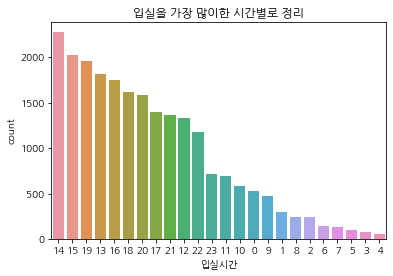

In [53]:
sns.countplot(data=ed, x=ed['입실시간'], order=ed['입실시간'].value_counts().index)
plt.title('입실을 가장 많이한 시간별로 정리')

In [28]:
sd = sales_data

In [29]:
sd['결제시간'] = sd['결제일시'].str[-5:-3]
sd.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,결제시간
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,19
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,19
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,19
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,19


###### 실제 판매된 정보만  가져오기

In [30]:
sd_t = sd[sd['판매수량']==1]
sd_t.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,결제시간
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,19
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,19
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,19
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,19
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,19


### 결제가 가장 많이 일어난 시간

Text(0.5, 1.0, '결제가 가장 많이 일어난 시간')

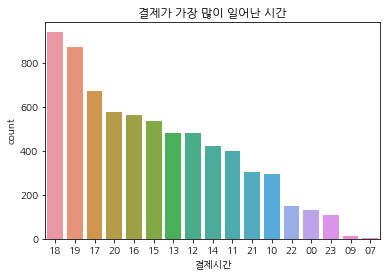

In [51]:
sns.countplot(data=sd_t, x=sd_t['결제시간'], order=sd_t['결제시간'].value_counts().index)
plt.title('결제가 가장 많이 일어난 시간')

###### 음식 판매량이 가장 많은 시간대는 17~20시
###### 입실을 가장 많이한 시간을 보면 17~20시는 절반 이상이다.
### 결론 : 17~20시에 이용 고객 + 결제가 가장 많으니 이 시간대에 이벤트를 하여 단골을 확보하자